In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
df = pd.read_csv('data/data.csv')

In [3]:
# Display the first few rows of the dataframe
df.head()

,Price,Apartment type,Metro station,Minutes to metro,Region,Number of rooms,Area,Living area,Kitchen area,Floor,Number of floors,Renovation
0,6300000.0,Secondary,Опалиха,6.0,Moscow region,1.0,30.6,11.1,8.5,25.0,25,Cosmetic
1,9000000.0,Secondary,Павшино,2.0,Moscow region,1.0,49.2,20.0,10.0,6.0,15,European-style renovation
2,11090000.0,Secondary,Мякинино,14.0,Moscow region,1.0,44.7,16.2,13.1,10.0,25,Cosmetic
3,8300000.0,Secondary,Строгино,8.0,Moscow region,1.0,35.1,16.0,11.0,12.0,33,European-style renovation
4,6450000.0,Secondary,Опалиха,6.0,Moscow region,1.0,37.7,15.2,4.0,5.0,5,Without renovation


In [4]:
# Display the shape of the dataframe
df.shape

(22676, 12)

In [5]:
# Display the column names of the dataframe
df.columns

Index(['Price', 'Apartment type', 'Metro station', 'Minutes to metro',
       'Region', 'Number of rooms', 'Area', 'Living area', 'Kitchen area',
       'Floor', 'Number of floors', 'Renovation'],
      dtype='object')

In [6]:
# Display the data types of the columns
df.dtypes

Price               float64
Apartment type       object
Metro station        object
Minutes to metro    float64
Region               object
Number of rooms     float64
Area                float64
Living area         float64
Kitchen area        float64
Floor               float64
Number of floors      int64
Renovation           object
dtype: object

In [7]:
# Display the summary statistics of the dataframe
df.describe()

,Price,Minutes to metro,Number of rooms,Area,Living area,Kitchen area,Floor,Number of floors
count,2.267600e+04,22676.000000,22676.000000,22676.000000,22676.000000,22676.000000,22676.000000,22676.000000
mean,3.612132e+07,11.888605,2.043129,71.966827,38.517953,12.594082,9.190466,16.556095
std,8.282561e+07,6.204457,1.523586,68.368608,38.124278,7.728074,7.549996,9.779297
min,1.150000e+06,0.000000,0.000000,6.000000,2.000000,1.000000,1.000000,1.000000
25%,7.068116e+06,7.000000,1.000000,37.400000,17.600000,8.600000,4.000000,11.000000
50%,1.134320e+07,11.000000,2.000000,53.300000,28.500000,10.600000,8.000000,16.000000
75%,2.479925e+07,15.000000,3.000000,77.140000,43.200000,14.500000,13.000000,20.000000
max,2.455020e+09,60.000000,12.000000,1117.000000,566.800000,122.000000,92.000000,97.000000


In [8]:
# Display the number of missing values in each column
df.isna().sum()

Price               0
Apartment type      0
Metro station       0
Minutes to metro    0
Region              0
Number of rooms     0
Area                0
Living area         0
Kitchen area        0
Floor               0
Number of floors    0
Renovation          0
dtype: int64

In [9]:
# Display the number of unique values in each column
df.nunique()

Price               9979
Apartment type         2
Metro station        547
Minutes to metro      56
Region                 2
Number of rooms       12
Area                3017
Living area         1302
Kitchen area         481
Floor                 72
Number of floors      83
Renovation             4
dtype: int64

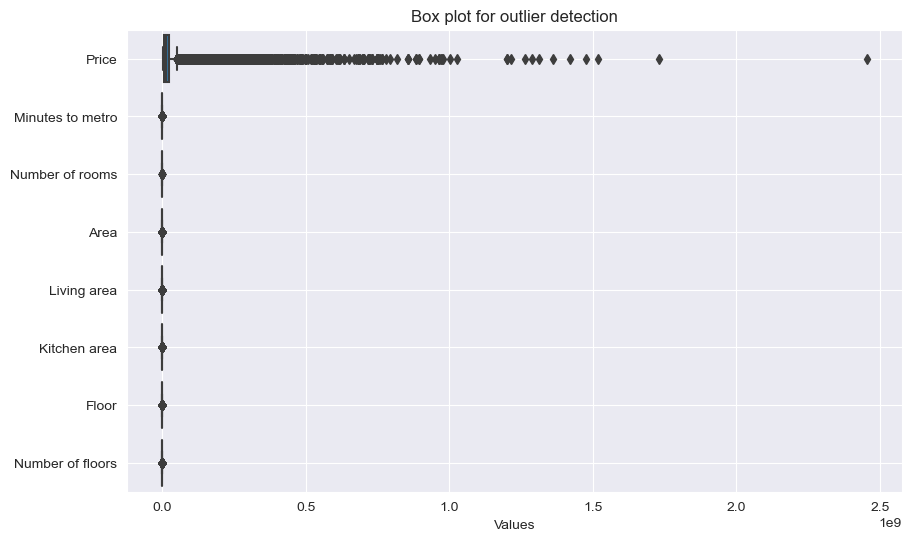

In [11]:
from scipy import stats

# Filter DataFrame to only numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64'])

# Calculate quantiles 
Q1 = numeric_cols.quantile(0.25)
Q3 = numeric_cols.quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Detect outliers 
outliers = ((numeric_cols < (Q1 - 1.5 * IQR)) |
            (numeric_cols > (Q3 + 1.5 * IQR)))

# Filter outliers
cleaned_df = df[~outliers]

# Calculate z-scores  
z_scores = stats.zscore(numeric_cols)

# Define threshold 
threshold = 3

# Filter outliers by z-score
outlier_indices = (np.abs(z_scores) > threshold).any(axis=1)
cleaned_df = df[~outlier_indices]

# Box plot for visualization
plt.figure(figsize=(10, 6))
sns.boxplot(data=numeric_cols, orient='h')
plt.title('Box plot for outlier detection')
plt.xlabel('Values')
plt.grid(True)
plt.show()

In [13]:
# Save cleaned DataFrame to new CSV file
cleaned_csv_file = 'moscow_houses.csv'
cleaned_df.to_csv(cleaned_csv_file, index=False)